In [31]:
import numpy as np
import matplotlib.pyplot as plt 
from casadi import *
import scipy.interpolate
import math

In [32]:
from casadi import *
from numpy import *
%matplotlib inline
#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
class Iteration_Callback(Callback):
    def __init__(self, name, nx, ng, opts={}):
        Callback.__init__(self)

        self.nx = nx
        self.ng = ng

        self.x_sols = []
        self.f_sols = []
        self.g_sols = []
        self.lam_x_sols = []
        self.lam_g_sols = []
        self.lam_p_sols = []
        '''
        #for plotting the graph in realtime
        self.fig= plt.figure()
        self.ax1= self.fig.add_subplot(1,2,1)
        self.ax2= self.fig.add_subplot(2,2,1)
        self.fig.show()
        '''
        # Initialize internal objects
        self.construct(name, opts)

    def get_n_in(self): return nlpsol_n_out()
    def get_n_out(self): return 1
    def get_name_in(self, i): return nlpsol_out(i)
    def get_name_out(self, i): return "ret"

    def get_sparsity_in(self, i):
        n = nlpsol_out(i)
        if n == 'f':
            return Sparsity.scalar()
        elif n in ('x', 'lam_x'):
            return Sparsity.dense(self.nx)
        elif n in ('g', 'lam_g'):
            return Sparsity.dense(self.ng)
        else:
            return Sparsity(0, 0)

    def eval(self, arg):
        
        darg = {}
        for (i, s) in enumerate(nlpsol_out()): darg[s] = arg[i]
        x_sol = [float(elem) for elem in darg['x'].full()]
        
        self.x_sols.append(x_sol)
        self.f_sols.append(darg['f'].full()[0][0])
        self.g_sols.append(darg['g'].full()[0][0])
        self.lam_x_sols.append(darg['lam_x'].full())
        self.lam_g_sols.append(darg['lam_g'].full())
        self.lam_p_sols.append(darg['lam_p'].full())
        #print("solution",self.f_sols)
        '''
        #for plotting the graph in realtime
        self.ax1.plot(self.x_sols)
        self.ax2.plot(self.f_sols)
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        plt.show()
        '''
        plt.plot(self.f_sols,color='C0')
        #plt.plot(self.g_sols,color='C0')
        #print(self.g_sols)
        return[0]

In [258]:
from casadi import *
import math
#dest = [4,2]
#way = [3,1]
#obs = [2,0.5]
dest = [4,2,45]
way = [2,0.66,45]
obs = [3,0]
#obs = [1.0,0.27]
#obs = [3,0]
angle_dest=dest[2]*(np.pi/180)
angle_way=way[2]*(np.pi/180)
#t=MX.sym('t')
#v=MX.sym('v')
dt=40
dt1=int(dt/2)
print(dt1)
rob_rad=0.2
obs_rad=0.2
ang=SX.sym("ang",dt)
v=SX.sym("v")
t1=SX.sym("t1")
t2=SX.sym("t2")
print(ang)
func,func1,func2=0,0,0
g1=0
g2=0
g=0
angle_w=0
angle_d=0
fuel_cost=0
penalty=40
penalty1=1
obstacle=0
theta=0
coff=0.00045
for i in range(0,dt1):
    func1=func1+v*cos(theta)*t1
    func2=func2+v*sin(theta)*t1
    theta=theta + (v / 1.2)*tan(ang[i])*t1
    g1+=(1/(sqrt((func1-obs[0])**2+(func2-obs[1])**2))+(rob_rad+obs_rad))
    fuel_cost+=(-0.0177*v**2+1.48*v+3.39)
    angle_w= sqrt((theta-angle_way)**2)
    if i==dt1-1:
            #g1=(sqrt((func1-obs[0])**2+(func2-obs[1])**2))+(rob_rad+obs_rad)
            func_con=(sqrt(coff+(func1-way[0])**2+(func2-way[1])**2))*penalty+fuel_cost+angle_w
for i in range(dt1,dt):
    func1=func1+v*cos(theta)*t2
    func2=func2+v*sin(theta)*t2
    theta=theta + (v / 1.2)*tan(ang[i])*t2
    g2+=(1/(sqrt((func1-obs[0])**2+(func2-obs[1])**2)))*penalty1+(rob_rad+obs_rad)
    fuel_cost+=(-0.0177*v**2+1.48*v+3.39)
    angle_d= sqrt((theta-angle_dest)**2)
    if i==dt-1:
        #g2=(sqrt((func1-obs[0])**2+(func2-obs[1])**2))+(rob_rad+obs_rad)
        func=func_con+(sqrt(coff+(func1-dest[0])**2+(func2-dest[1])**2))*(g1+g2)+fuel_cost+angle_d
        print("func",func)
            #print("g",g)

            
nlp= {}
nlp['x']=vertcat(ang,v,t1,t2)
#nlp['x']=vertcat(v,t) 
nlp['f']=func
nlp['g']=g


20
[ang_0, ang_1, ang_2, ang_3, ang_4, ang_5, ang_6, ang_7, ang_8, ang_9, ang_10, ang_11, ang_12, ang_13, ang_14, ang_15, ang_16, ang_17, ang_18, ang_19, ang_20, ang_21, ang_22, ang_23, ang_24, ang_25, ang_26, ang_27, ang_28, ang_29, ang_30, ang_31, ang_32, ang_33, ang_34, ang_35, ang_36, ang_37, ang_38, ang_39]
func @1=0.00045, @2=(v*t1), @3=1.2, @4=(((v/@3)*tan(ang_0))*t1), @5=(@2+((v*cos(@4))*t1)), @6=(@4+(((v/@3)*tan(ang_1))*t1)), @7=(@5+((v*cos(@6))*t1)), @8=(@6+(((v/@3)*tan(ang_2))*t1)), @9=(@7+((v*cos(@8))*t1)), @10=(@8+(((v/@3)*tan(ang_3))*t1)), @11=(@9+((v*cos(@10))*t1)), @12=(@10+(((v/@3)*tan(ang_4))*t1)), @13=(@11+((v*cos(@12))*t1)), @14=(@12+(((v/@3)*tan(ang_5))*t1)), @15=(@13+((v*cos(@14))*t1)), @16=(@14+(((v/@3)*tan(ang_6))*t1)), @17=(@15+((v*cos(@16))*t1)), @18=(@16+(((v/@3)*tan(ang_7))*t1)), @19=(@17+((v*cos(@18))*t1)), @20=(@18+(((v/@3)*tan(ang_8))*t1)), @21=(@19+((v*cos(@20))*t1)), @22=(@20+(((v/@3)*tan(ang_9))*t1)), @23=(@21+((v*cos(@22))*t1)), @24=(@22+(((v/@3)*tan(

F:(x0[43],p[],lbx[43],ubx[43],lbg,ubg,lam_x0[43],lam_g0)->(x[43],f,g,lam_x[43],lam_g,lam_p[]) IpoptInterface
0.52359
[0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.2, 0.2, 0.2]
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      946

Total number of variables............................:       43
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       43
                     variables with only upper bounds:     

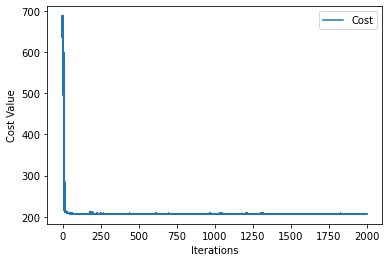

1.99977 0.66065
3.99939 2.00022


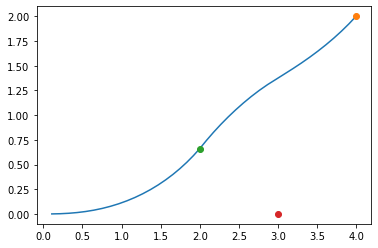

In [259]:
#solver=F(x0=[0.1,2],lbx=lbx,ubx=ubx)
#fcn = Function('f', nlp['x'], [f])
mycallback = Iteration_Callback('mycallback',(dt+3), 1)
opts = {}
opts['iteration_callback'] = mycallback
opts['ipopt.tol'] = 1e-8
#opts['ipopt.bound_frac'] = 0.01
#opts['ipopt.bound_push'] = 0.01
#opts['ipopt.hessian_approximation']= "limited-memory"
opts["ipopt.max_iter"]=2000
#create solver instance
F = nlpsol('F','ipopt',nlp,opts);
#F=qpsol('F','qpoases',nlp);
print(F)


ang_upl=[0.52359]
for j in range(0,len(ang_upl)):
    x0=[]
    lbx=[]
    ubx=[]
# the loop for setting angle
    for i in range(0,dt):
        x0.append(0.002)
        lbx.append(-0.52359)
        #ubx.append(0.5)  #previous value
        ang_up=ang_upl[j]
        ubx.append(ang_up)
# the loop for setting velocity  
    for i in range(0,1):
        x0.append(0.2)
        lbx.append(0.02)
        ubx.append(2)
    # the loop for setting sample time 
    for i in range(0,1):
        x0.append(0.2)
        lbx.append(1)
        ubx.append(100)
    for i in range(0,1):
        x0.append(0.2)
        lbx.append(1)
        ubx.append(100)
    print(ang_up)
    print(x0)
    solver=F(x0=x0,lbx=lbx,ubx=ubx)
    out=[]
    out.append(solver["x"])
    print("solved output",out)
    print("solved function output",solver["f"])
    plt.legend(["Cost"])
    plt.xlabel("Iterations")
    plt.ylabel("Cost Value")
    plt.show()
    ang=[]
    v=[]
    t1=[]
    t2=[]
    for i in range(0,dt):
        ang.append(out[0][i])
    v.append(out[0][dt])
    t1.append(out[0][dt+1])
    t2.append(out[0][dt+2])
    xc,yc=[],[]
    theta=0.0
    x1,x2=0,0
    for i in range(0,dt1):
        x1=x1+v[0]*math.cos(theta)*t1[0]
        x2=x2+v[0]*math.sin(theta)*t1[0]
        theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t1[0]
        xc.append(x1)
        yc.append(x2)
    print(x1,x2)
    for i in range(dt1,dt):
        x1=x1+v[0]*math.cos(theta)*t2[0]
        x2=x2+v[0]*math.sin(theta)*t2[0]
        theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t2[0]
        xc.append(x1)
        yc.append(x2)
    print(x1,x2)
    plt.plot(xc,yc,dest[0],dest[1],"o",way[0],way[1],"o",obs[0],obs[1],"o")

1.99977 0.66065
[DM(0.108029), DM(0.21604), DM(0.323977), DM(0.431761), DM(0.539286), DM(0.646418), DM(0.753004), DM(0.858876), DM(0.963853), DM(1.06774), DM(1.17034), DM(1.27143), DM(1.37081), DM(1.46824), DM(1.56351), DM(1.6564), DM(1.74668), DM(1.83415), DM(1.91858), DM(1.99977), DM(2.08676), DM(2.1761), DM(2.26794), DM(2.36225), DM(2.45893), DM(2.55789), DM(2.65909), DM(2.76258), DM(2.86849), DM(2.97678), DM(3.0849), DM(3.19297), DM(3.30002), DM(3.40578), DM(3.51004), DM(3.61254), DM(3.71303), DM(3.81122), DM(3.90681), DM(3.99939)]
[DM(0), DM(0.0019903), DM(0.00645219), DM(0.0137231), DM(0.0241522), DM(0.0380475), DM(0.0556463), DM(0.0771263), DM(0.102624), DM(0.132245), DM(0.16607), DM(0.204154), DM(0.246523), DM(0.293183), DM(0.344111), DM(0.399267), DM(0.458588), DM(0.521993), DM(0.589385), DM(0.66065), DM(0.744581), DM(0.826002), DM(0.904591), DM(0.980204), DM(1.05276), DM(1.12218), DM(1.18829), DM(1.25073), DM(1.309), DM(1.36271), DM(1.41676), DM(1.47092), DM(1.52706), DM(1.58

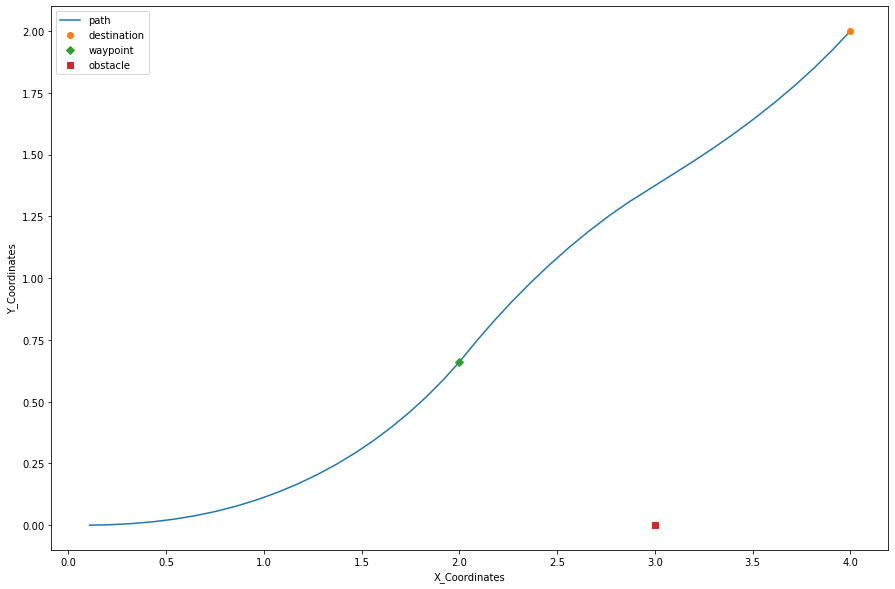

In [260]:
import matplotlib.pyplot as plt
import math
ang=[]
v=[]
t1=[]
t2=[]
for i in range(0,dt):
    ang.append(out[0][i])
v.append(out[0][dt])
t1.append(out[0][dt+1])
t2.append(out[0][dt+2])
xc,yc=[],[]
theta=0.0
x1,x2=0,0
for i in range(0,dt1):
    x1=x1+v[0]*math.cos(theta)*t1[0]
    x2=x2+v[0]*math.sin(theta)*t1[0]
    theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t1[0]
    xc.append(x1)
    yc.append(x2)
print(x1,x2)
for i in range(dt1,dt):
    x1=x1+v[0]*math.cos(theta)*t2[0]
    x2=x2+v[0]*math.sin(theta)*t2[0]
    theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t2[0]
    xc.append(x1)
    yc.append(x2)
print(xc)
print(yc)
plt.figure(figsize=(15,10))
plt.plot(xc,yc,dest[0],dest[1],"o",way[0],way[1],"D",obs[0],obs[1],"s")
plt.legend(["path", "destination","waypoint","obstacle"])
plt.xlabel("X_Coordinates")
plt.ylabel("Y_Coordinates")
plt.savefig("obsplot.png")

In [149]:
temp1=[[]]
for i in range(0,len(xc)):
    temp1.append([xc[i],yc[i]])
print(temp1)

[[], [DM(0.077201), DM(0)], [DM(0.154365), DM(0.00239878)], [DM(0.231417), DM(0.00719403)], [DM(0.308282), DM(0.0143811)], [DM(0.384888), DM(0.0239531)], [DM(0.461158), DM(0.0359007)], [DM(0.537021), DM(0.0502125)], [DM(0.612403), DM(0.0668745)], [DM(0.68723), DM(0.0858707)], [DM(0.761431), DM(0.107183)], [DM(0.835198), DM(0.129952)], [DM(0.908965), DM(0.152721)], [DM(0.982732), DM(0.17549)], [DM(1.0565), DM(0.198259)], [DM(1.13027), DM(0.221027)], [DM(1.20403), DM(0.243796)], [DM(1.2778), DM(0.266565)], [DM(1.35157), DM(0.289334)], [DM(1.42533), DM(0.312103)], [DM(1.49857), DM(0.336536)], [DM(1.55549), DM(0.357515)], [DM(1.61188), DM(0.379877)], [DM(1.66771), DM(0.403609)], [DM(1.72295), DM(0.428697)], [DM(1.77755), DM(0.455127)], [DM(1.83149), DM(0.482882)], [DM(1.88474), DM(0.511947)], [DM(1.93727), DM(0.542302)], [DM(1.98904), DM(0.573931)], [DM(2.04001), DM(0.606815)], [DM(2.09018), DM(0.640934)], [DM(2.13949), DM(0.676267)], [DM(2.18792), DM(0.712794)], [DM(2.23545), DM(0.750493)